In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('data.csv')
df

,Unnamed: 0.1,Unnamed: 0,id,eventId,minute,second,teamId,x,y,expandedMinute,...,start_zone_value_xT,end_zone_value_xT,xT,teamName,shirtNo,name,position,isFirstEleven,pro,shortName
0,0,0,2.701068e+09,2,0,0.0,338,0.000,0.000,0,...,NaN,NaN,NaN,Spain,NaN,NaN,NaN,NaN,0.000000,NaN
1,1,1,2.701068e+09,2,0,0.0,345,0.000,0.000,0,...,NaN,NaN,NaN,England,NaN,NaN,NaN,NaN,0.000000,NaN
2,2,2,2.701068e+09,3,0,0.0,345,52.500,34.000,0,...,-0.016895,0.011324,-0.005572,England,26.0,Kobbie Mainoo,DMC,True,-24.170388,K. Mainoo
3,3,3,2.701068e+09,4,0,4.0,345,29.505,38.556,0,...,NaN,NaN,NaN,England,1.0,Jordan Pickford,GK,True,0.000000,J. Pickford
4,4,4,2.701068e+09,4,0,33.0,338,5.250,37.332,0,...,0.009411,0.008880,-0.000531,Spain,23.0,Unai Simón,GK,True,0.000000,U. Simón
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,1378,1378,2.701090e+09,901,94,2.0,338,0.000,0.000,96,...,NaN,NaN,NaN,Spain,NaN,NaN,NaN,NaN,0.000000,NaN
1383,1379,1379,2.701090e+09,902,0,0.0,338,0.000,0.000,6,...,NaN,NaN,NaN,Spain,NaN,NaN,NaN,NaN,0.000000,NaN
1384,1380,1380,2.701090e+09,627,0,0.0,345,0.000,0.000,6,...,NaN,NaN,NaN,England,NaN,NaN,NaN,NaN,0.000000,NaN
1385,1381,1381,2.701064e+09,1,0,0.0,338,0.000,0.000,0,...,NaN,NaN,NaN,Spain,NaN,NaN,NaN,NaN,0.000000,NaN


In [24]:
df['second'].duplicated().values.any()

True

In [25]:
df['second'].unique()

array([ 0.,  4., 33., 35., 39., 40., 41., 56., 57., 58., 59.,  1.,  5.,
        8., 14., 22., 28., 31., 32., 38., 43., 50., 52., 11., 13., 15.,
       16., 20., 25., 30., 46., 49., 55.,  7.,  9., 17., 19., 42., 44.,
       47., 48., 54., 18., 53.,  2., 10., 23., 34., 51.,  3., 26., 36.,
       45., 21., 27.,  6., 29., 37., 24., 12., nan])

In [26]:
shirts = df['second'].tolist()
final_shirts = []

for each in shirts:
    if isinstance(each, float) and np.isnan(each):
        final_shirts.append(each)
    else:
        final_shirts.append(each)

final_shirts = pd.Series(final_shirts, dtype=pd.Int64Dtype())
df['second'] = final_shirts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          1387 non-null   int64  
 1   Unnamed: 0            1387 non-null   int64  
 2   id                    1387 non-null   float64
 3   eventId               1387 non-null   int64  
 4   minute                1387 non-null   int64  
 5   second                1386 non-null   Int64  
 6   teamId                1387 non-null   int64  
 7   x                     1387 non-null   float64
 8   y                     1387 non-null   float64
 9   expandedMinute        1387 non-null   int64  
 10  period                1387 non-null   object 
 11  type                  1387 non-null   object 
 12  outcomeType           1387 non-null   object 
 13  qualifiers            1387 non-null   object 
 14  satisfiedEventsTypes  1387 non-null   object 
 15  isTouch              

In [32]:
df['Period'] = pd.qcut(df['second'], q = 4, labels=['Early', 'Mid', 'Late', 'End'])

In [37]:
df.head(20)

,Unnamed: 0.1,Unnamed: 0,id,eventId,minute,second,teamId,x,y,expandedMinute,...,end_zone_value_xT,xT,teamName,shirtNo,name,position,isFirstEleven,pro,shortName,Period
0,0,0,2.701068e+09,2,0,0,338,0.000,0.000,0,...,NaN,NaN,Spain,NaN,NaN,NaN,NaN,0.000000,NaN,Early
1,1,1,2.701068e+09,2,0,0,345,0.000,0.000,0,...,NaN,NaN,England,NaN,NaN,NaN,NaN,0.000000,NaN,Early
2,2,2,2.701068e+09,3,0,0,345,52.500,34.000,0,...,0.011324,-0.005572,England,26.0,Kobbie Mainoo,DMC,True,-24.170388,K. Mainoo,Early
3,3,3,2.701068e+09,4,0,4,345,29.505,38.556,0,...,NaN,NaN,England,1.0,Jordan Pickford,GK,True,0.000000,J. Pickford,Early
4,4,4,2.701068e+09,4,0,33,338,5.250,37.332,0,...,0.008880,-0.000531,Spain,23.0,Unai Simón,GK,True,0.000000,U. Simón,Late
5,5,5,2.701068e+09,5,0,35,338,9.450,18.632,0,...,0.008449,-0.000431,Spain,3.0,Robin Le Normand,DC,True,0.000000,R. L. Normand,Late
6,6,6,2.701068e+09,6,0,39,338,29.610,3.332,0,...,0.012483,0.002707,Spain,2.0,Dani Carvajal,DR,True,0.000000,D. Carvajal,Late
7,7,7,2.701068e+09,7,0,40,338,46.095,7.616,0,...,NaN,NaN,Spain,10.0,Dani Olmo,AMC,True,0.000000,D. Olmo,Late
8,8,8,2.701068e+09,8,0,41,338,54.705,9.656,0,...,NaN,NaN,Spain,7.0,Álvaro Morata,FW,True,0.000000,Á. Morata,Late
9,9,9,2.701068e+09,6,0,41,345,39.900,55.216,0,...,NaN,NaN,England,6.0,Marc Guéhi,DC,True,0.000000,M. Guéhi,Late


<Axes: xlabel='Period'>

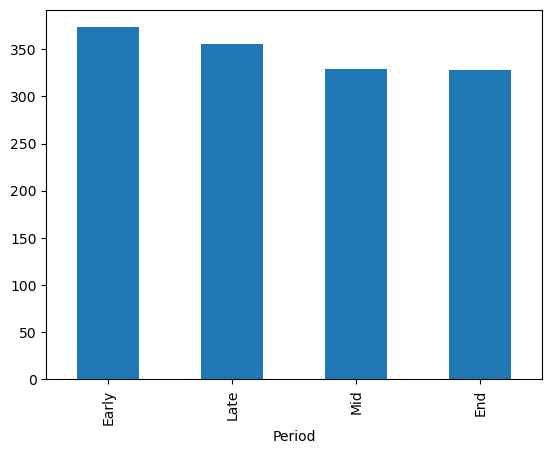

In [40]:
df['Period'].value_counts().plot(kind='bar')

In [52]:
def binningFn(col: pd.Series(), no_of_bins):
    col.dropna()
    col_list = col.tolist()
    gap = (col.max() - col.min()) / no_of_bins
    print('Gap:', gap)

    bins_list = []
    for i in range(no_of_bins+1):
        lower = col.min() + (gap * i)
        upper = lower + gap
        print(lower, upper)

        interval = pd.Interval(lower, upper, closed='left')
        print('Interval: ', interval)

        bins_list.append([val for val in col_list if val in interval and val is not np.nan])

    bins_list = pd.Series(bins_list)
    return bins_list

In [53]:
df['Period2'] = binningFn(df['second'], 4)

Gap: 14.75
0.0 14.75
Interval:  [0.0, 14.75)


TypeError: boolean value of NA is ambiguous